In [46]:
# /!\ Bien spécifier l'URL du dossier contenant les images :
url_img = '../../images'

## Lib

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cv2
%matplotlib inline

## Fonctions

In [49]:
# Création d'un echantillon aléatoire d'un DataFrame
def gen_ech(df,size=0.1):
# Si size=0.1 : 10% du contenu initial
    taille_dataframe = len(df)
    taille_echantillon = int(size * taille_dataframe)
    df_ech = infos_images.sample(n=taille_echantillon)
    df_ech.reset_index(inplace=True, drop=True)
    return df_ech

In [63]:
# Pré-requis : matplotlib, numpy

# Afficher des images aléatoires d'un DF qui contient des URL vers des images
def tirage_aleatoire(df, dataframe_col_label, dataframe_col_url, nb_tirages=5):

    '''Créé une figure composée d'images tirées aléatoirement de l'échantillon du dataframe 'infos_images.
        L'argument nb_tirages définit le nombre d'images à afficher.'''

    plt.figure(figsize=(12,12))
    indice_aleatoire = np.random.choice(len(df), size=nb_tirages, replace=False)
    subplot_colonnes = nb_tirages
    subplot_lignes = (nb_tirages + subplot_colonnes - 1) // subplot_colonnes

    for i, j in enumerate(indice_aleatoire):
        plt.subplot(subplot_lignes,subplot_colonnes,i+1)
        plt.subplots_adjust(wspace=0.8, hspace=0.2)               # Eviter que les subplots se retrouvent torp proches
        img = plt.imread(dataframe_col_url[j])                    # Lecture de l'image
        height, width, _ = img.shape                              # Lecture des dimensions de l'image
        plt.axis('off')                                           # Retrait des axes
        plt.imshow(img)                                           # Affichage de l'image
        plt.title(f"{dataframe_col_label[j]}\n{width}x{height}")  # Titre de l'image -> Nom d'espèce et dimensions

In [52]:
# Extrait les features d'une image
def extract_features(url_img):
    img = cv2.imread(url_img)
    hauteur, largeur, canal = img.shape
    features = {
        'largeur': largeur,
        'hauteur': hauteur,
        'moyenne_rouge': np.mean(img[:,:,2]),  # OpenCV utilise BGR par défaut
        'moyenne_vert': np.mean(img[:,:,1]),
        'moyenne_bleu': np.mean(img[:,:,0]),
    }
    return features

In [53]:
# Créer un DF ne contenant que le top X des labels
def gen_top(df,top=10):
    nb_val = df['label'].value_counts()
    nb_val_label = nb_val.head(10)
    nb_val_label = nb_val_label.index
    top10 = df[df['label'].isin(nb_val_label)]
    top10.reset_index(inplace=True, drop=True)

    print(f"Nombre d'images chargées : {top10.shape[0]}")
    print(f"Nb de labels uniques: {top10['label'].nunique()}")
    return top10

## Import DF

In [54]:
especes_classification  = pd.read_csv('../data/especes_classification.csv', low_memory=False)
especes_key  = pd.read_csv('../data/especes_key.csv', low_memory=False)
infos_images  = pd.read_csv('../data/infos_images.csv', low_memory=False)

### Construction d'un df 'echantillon' pour accelerer les analyses

In [55]:
infos_images.drop('image_lien', axis=1, inplace=True)
infos_images.head()

,label,image_url
0,Agaricaceae,..../images/332044.jpg
1,Agaricaceae,..../images/171135.jpg
2,Agaricaceae,..../images/243640.jpg
3,Agaricaceae,..../images/341497.jpg
4,Agaricaceae,..../images/341496.jpg


In [56]:
echantillon = gen_ech(infos_images, size=0.1)

 # Quelquesoit la taille de l'echantillon, les 130 espèces doivent être présentes
print(f"Nombre d'images chargées: {echantillon.shape[0]}")
print(f"Nb especes dans l'echantillon: {echantillon['label'].nunique()}")

Nombre d'images chargées: 20751
Nb especes dans l'echantillon: 130


In [21]:
echantillon.head()

,label,image_lien,image_url
0,Boletaceae,648241.jpg,..../images/648241.jpg
1,Galerina,394989.jpg,..../images/394989.jpg
2,Lycogala epidendrum,670846.jpg,..../images/670846.jpg
3,Psilocybe cyanescens,290322.jpg,..../images/290322.jpg
4,Trichaptum biforme,28110.jpg,..../images/28110.jpg


## Recherches de corrélations (variables dataframes)

In [39]:
# Extractions des corrélations supérieures à 85 :
matrice_corr = especes_key.corr()

correlations_superieures_85pourcent = matrice_corr[matrice_corr.abs() > 0.85]

# Les valeurs en diagonales (corrélaiton à 1 sur une même variable) seront ignorées :
correlations_superieures_85pourcent = correlations_superieures_85pourcent.mask(np.eye(len(correlations_superieures_85pourcent), dtype=bool))

print('Seules les variables usageKey et speciesKey présentent une corrélation supérieure à 85%. Dans le cas présent : 97% \n')
print(correlations_superieures_85pourcent)


Seules les variables usageKey et speciesKey présentent une corrélation supérieure à 85%. Dans le cas présent : 97% 

                   kingdomKey  familyKey  speciesKey  genusKey  phylumKey  \
kingdomKey                NaN        NaN         NaN       NaN        NaN   
familyKey                 NaN        NaN         NaN       NaN        NaN   
speciesKey                NaN        NaN         NaN       NaN        NaN   
genusKey                  NaN        NaN         NaN       NaN        NaN   
phylumKey                 NaN        NaN         NaN       NaN        NaN   
orderKey                  NaN        NaN         NaN       NaN        NaN   
classKey                  NaN        NaN         NaN       NaN        NaN   
scientificNameKey         NaN        NaN    0.971385       NaN        NaN   
saison                    NaN        NaN         NaN       NaN        NaN   
label_id                  NaN        NaN         NaN       NaN        NaN   

                   orderKey  classK

C:\Users\guill\AppData\Local\Temp\ipykernel_17688\3501139962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_corr = especes_key.corr()


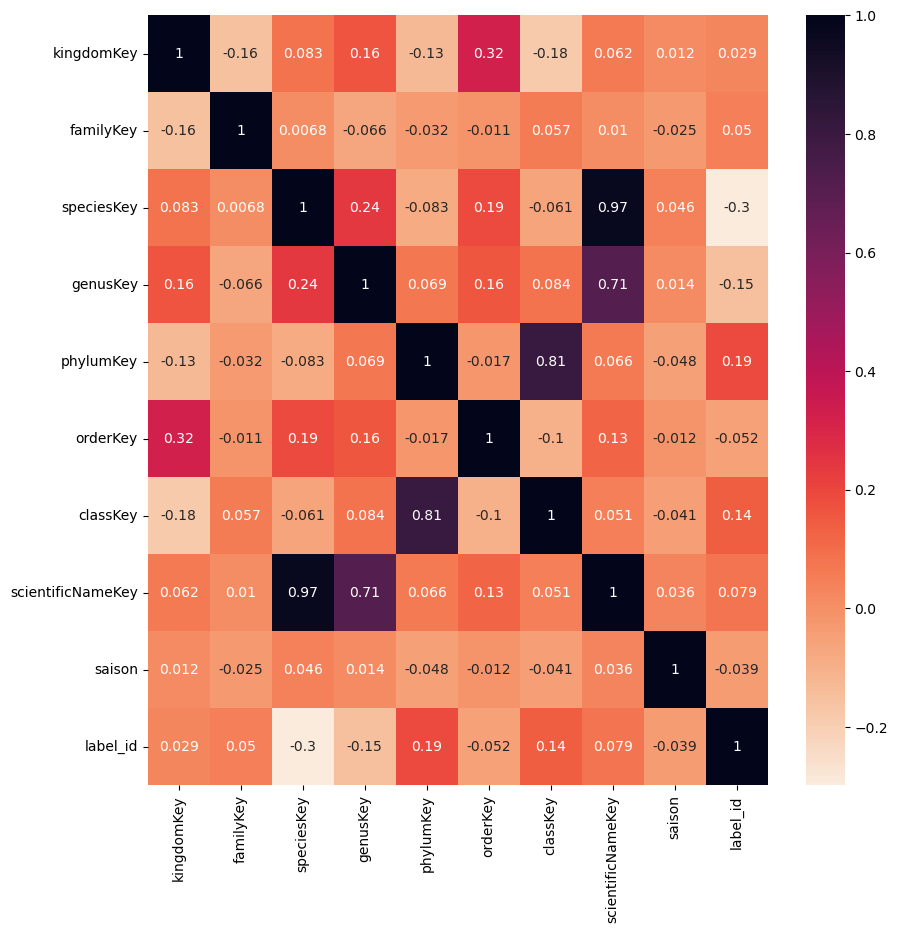

In [40]:
# Représentation sous forme de heatmap :
fig = plt.figure(figsize=(10,10))
sns.heatmap(matrice_corr, annot = True, cmap = 'rocket_r');

In [42]:
# Vérification de corrélation entre speciesKey et scientificName
from scipy.stats import chi2_contingency as chi2

table = pd.crosstab(especes_key['speciesKey'], especes_key['scientificNameKey'])

resultats_chi2 = chi2(table)

stat = resultats_chi2[0]
p_value = resultats_chi2[1]
degre_liberte = resultats_chi2[2]

print('p_value :', p_value)

p_value : 0.0


## Etude de la variable cible : 'label'

### Partie 130 espèces

In [30]:
# on s'interesse aux espèces représentées
print('Nombre d\'occurences uniques :')
print(infos_images['label'].nunique())

print('\n Nombre d\'apparitions dans le dataframe :')
print('\n', infos_images['label'].value_counts())

print('\n Pourcentage d\'apparitions :')
print('\n', (infos_images['label'].value_counts(normalize = True)*100).round(2))

Nombre d'occurences uniques :
130

 Nombre d'apparitions dans le dataframe :

 Agaricales                   11517
Russula                       8238
Cortinarius                   7352
Polyporales                   6864
Inocybe                       5607
                             ...  
Trametes betulina              660
Amanita sect. Phalloideae      657
Armillaria tabescens           654
Amanita flavorubens            651
Amanita brunnescens            650
Name: label, Length: 130, dtype: int64

 Pourcentage d'apparitions :

 Agaricales                   5.55
Russula                      3.97
Cortinarius                  3.54
Polyporales                  3.31
Inocybe                      2.70
                             ... 
Trametes betulina            0.32
Amanita sect. Phalloideae    0.32
Armillaria tabescens         0.32
Amanita flavorubens          0.31
Amanita brunnescens          0.31
Name: label, Length: 130, dtype: float64


C:\Users\guill\AppData\Local\Temp\ipykernel_17688\3985157933.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top10_et_reste = top10_label.append(pd.Series([reste_hors_top10], index=['Autres']))


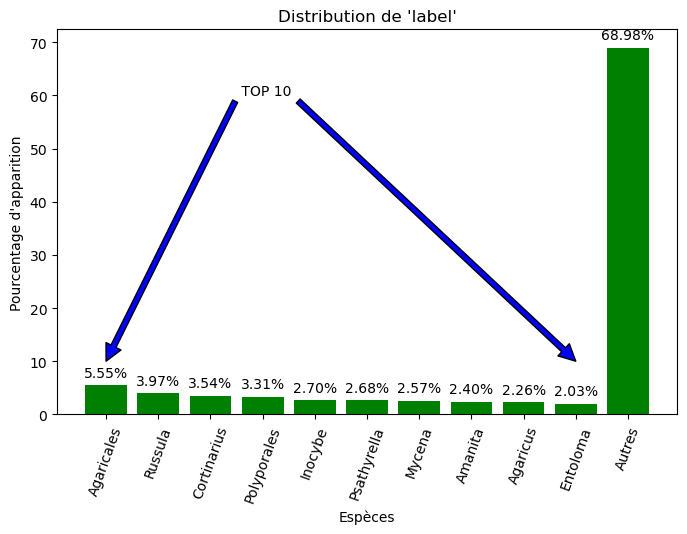

In [31]:
# Représentation de la distribution de la variable :

# Création du top 10 des espèces les plus représentées.
comptage_valeurs = infos_images['label'].value_counts()
top10_label = comptage_valeurs.head(10)

# Reste des valeurs présentes :
reste_hors_top10 = comptage_valeurs.iloc[10:].sum()

# Création d'une series contenant le top 10 et le reste.
top10_et_reste = top10_label.append(pd.Series([reste_hors_top10], index=['Autres']))

# Calcul des pourcentages pour chaque valeur (espèce) :
total = infos_images['label'].count()
pourcentages_valeurs_top10 = (top10_label / total) * 100    # uniquement le top 10
pourcentages_valeurs_tout = (top10_et_reste / total) * 100  # Toutes les espèces (top 10 + le reste)


# Construction du graphique :
plt.figure(figsize=(8,5))
#plt.grid(True, linestyle = '--')

plt.title('Distribution de \'label\'')
plt.xlabel('Espèces')
plt.xticks(rotation = 70)
plt.ylabel('Pourcentage d\'apparition')
plt.bar(pourcentages_valeurs_tout.index, pourcentages_valeurs_tout, color = 'g')

# Affichage les pourcentages au-dessus des barres
for i, value in enumerate(pourcentages_valeurs_tout):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom')


plt.annotate(' TOP 10 ', xy=(9, 10), xytext=(2.5, 60), arrowprops={'facecolor':'blue'})
plt.annotate(' ', xy=(0, 10), xytext=(2.5, 60), arrowprops={'facecolor':'blue'});

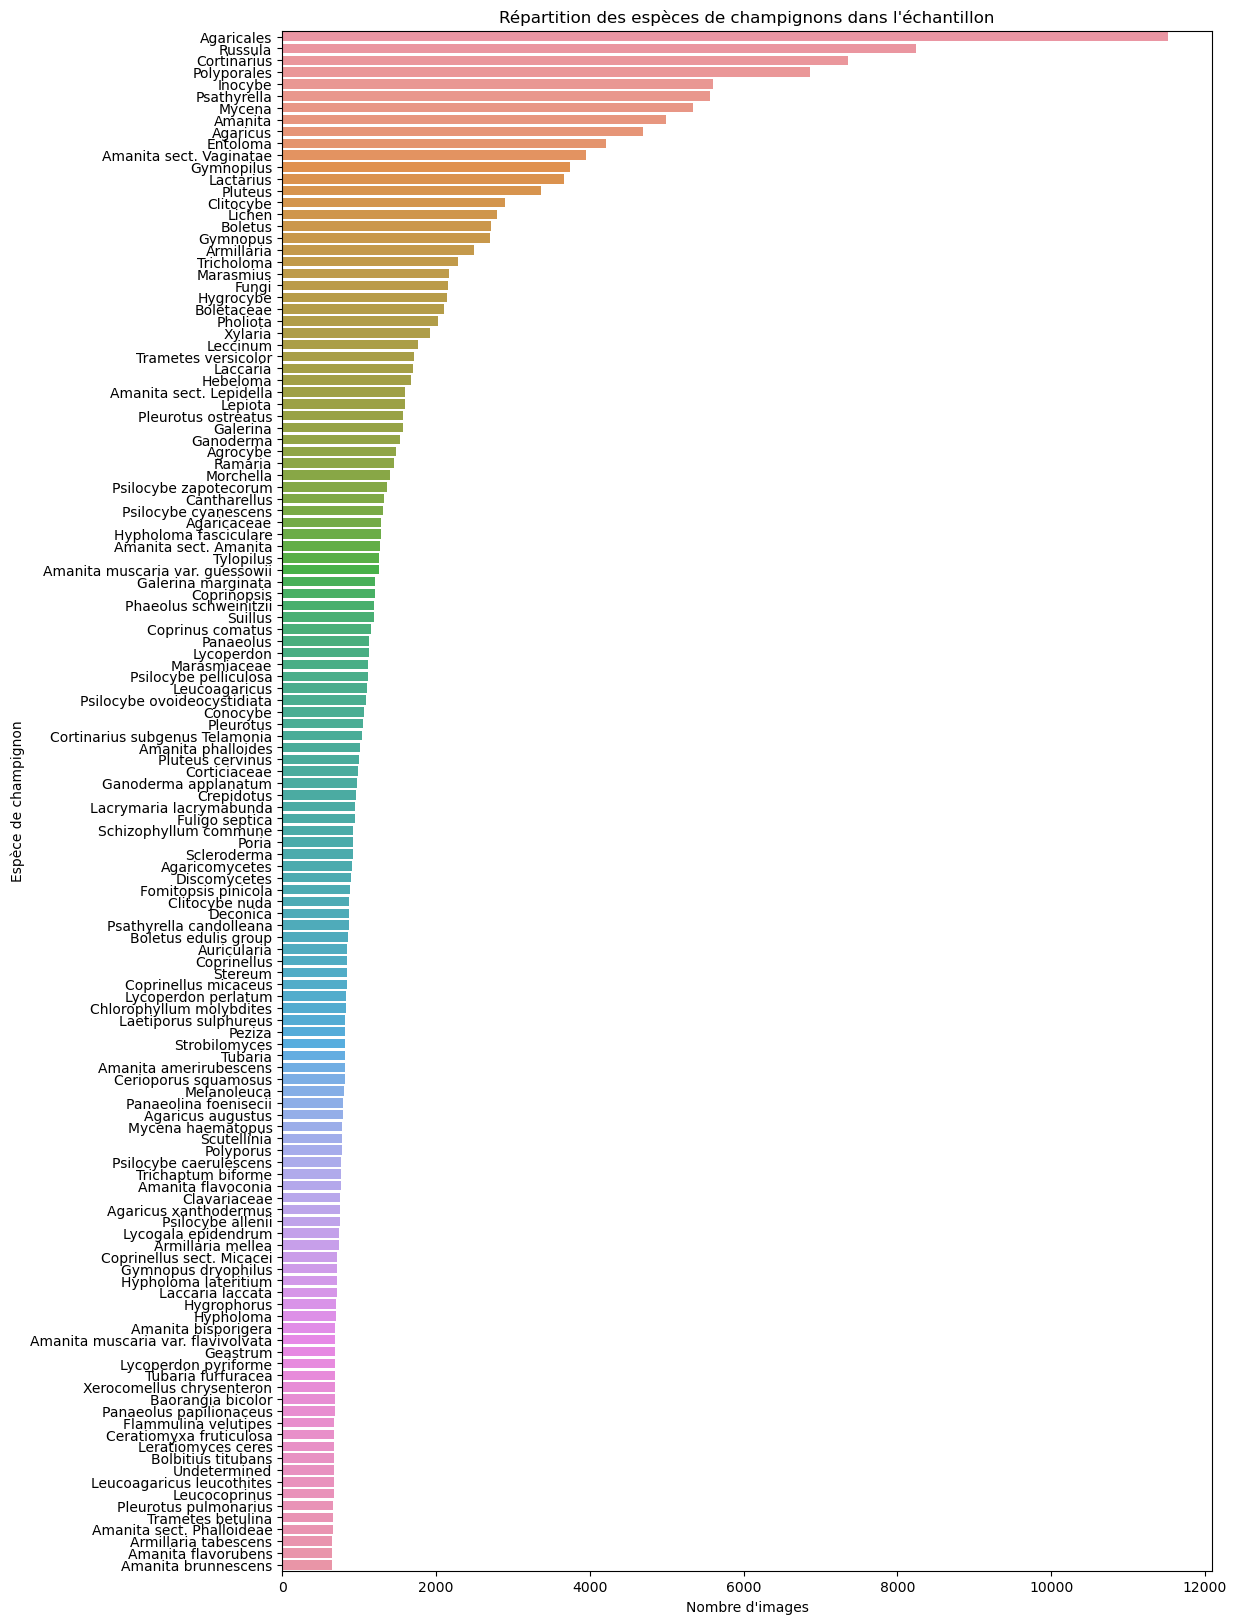

In [43]:
# Analyse des labels de champignons dans l'echantillon
plt.figure(figsize=(12, 20))
sns.countplot(data=infos_images, y="label", order=infos_images["label"].value_counts().index)
plt.xlabel("Nombre d'images")
plt.ylabel("Espèce de champignon")
plt.title("Répartition des espèces de champignons dans l'échantillon")
plt.show()

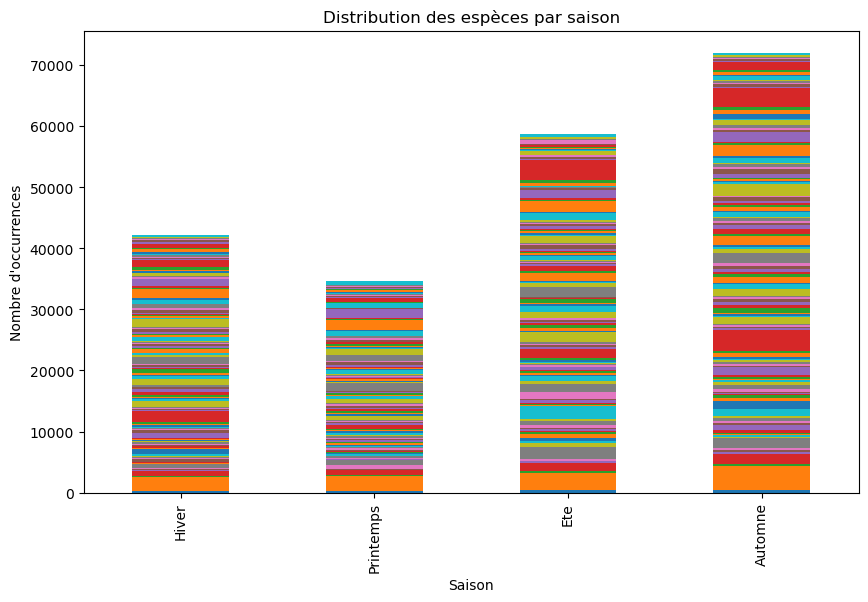

In [33]:
saisons_counts = especes_classification.groupby(['saison', 'label']).size().unstack(fill_value=0)
saisons_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution des espèces par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre d\'occurrences')
plt.xticks([0,1,2,3], ['Hiver', 'Printemps', 'Ete', 'Automne'], rotation = 90)
plt.legend().set_visible(False);

In [34]:
saison_nom = {1 : 'Hiver', 2 : 'Printemps', 3 : 'Ete', 4 : 'Automne'}
saisons_counts.rename(columns=saison_nom, inplace=True)

total_saison = saisons_counts.sum()
saisons_counts = np.round((saisons_counts / total_saison) * 100,2)

saisons_counts = saisons_counts.T
print('Repartition especes par saison en pourcentages')
saisons_counts

Repartition especes par saison en pourcentages


saison,1,2,3,4
label,,,,
Agaricaceae,16.41,22.94,29.70,30.95
Agaricales,19.64,20.76,25.15,34.45
Agaricomycetes,19.58,27.13,23.19,30.09
Agaricus,19.61,15.54,28.21,36.64
Agaricus augustus,10.04,11.05,36.09,42.82
...,...,...,...,...
Tubaria furfuracea,45.61,20.03,4.09,30.26
Tylopilus,16.13,9.72,54.62,19.53
Undetermined,32.49,22.40,23.44,21.66


### Partie 10 espèces

In [35]:
# on s'interesse aux espèces représentées
print('Nombre d\'occurences uniques :')
print(top10['label'].nunique())

print('\n Nombre d\'apparitions dans le dataframe :')
print('\n', top10['label'].value_counts())

print('\n Pourcentage d\'apparitions :')
print('\n', (top10['label'].value_counts(normalize = True)*100).round(2))

Nombre d'occurences uniques :
10

 Nombre d'apparitions dans le dataframe :

 Agaricales     11517
Russula         8238
Cortinarius     7352
Polyporales     6864
Inocybe         5607
Psathyrella     5564
Mycena          5342
Amanita         4987
Agaricus        4693
Entoloma        4209
Name: label, dtype: int64

 Pourcentage d'apparitions :

 Agaricales     17.89
Russula        12.80
Cortinarius    11.42
Polyporales    10.66
Inocybe         8.71
Psathyrella     8.64
Mycena          8.30
Amanita         7.75
Agaricus        7.29
Entoloma        6.54
Name: label, dtype: float64


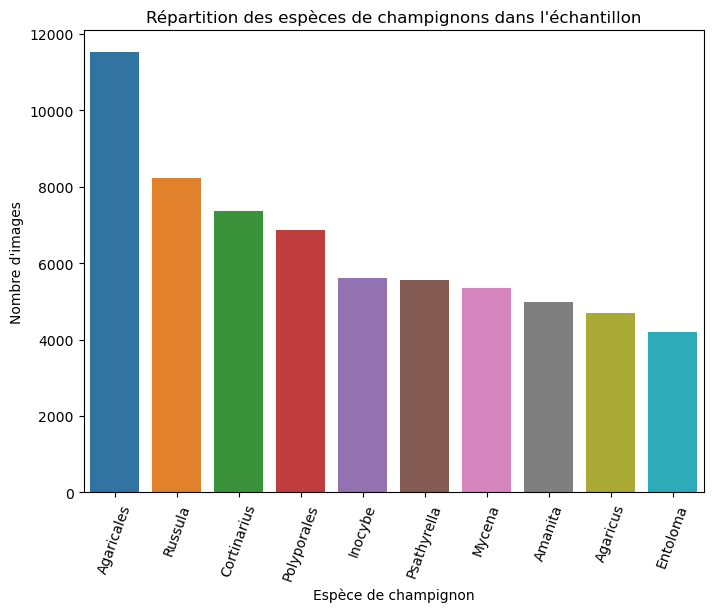

In [38]:
# Analyse des labels de champignons dans l'echantillon
plt.figure(figsize=(8, 6))
sns.countplot(data=top10, x="label", order=top10["label"].value_counts().index)
plt.xlabel("Espèce de champignon")
plt.xticks(rotation=70)
plt.ylabel("Nombre d'images")
plt.title("Répartition des espèces de champignons dans l'échantillon")
plt.show()

## Analyses des images

### Partie 130 espèces

In [57]:
infos_images.head()

,label,image_url
0,Agaricaceae,..../images/332044.jpg
1,Agaricaceae,..../images/171135.jpg
2,Agaricaceae,..../images/243640.jpg
3,Agaricaceae,..../images/341497.jpg
4,Agaricaceae,..../images/341496.jpg


FileNotFoundError: [Errno 2] No such file or directory: '..../images/683278.jpg'

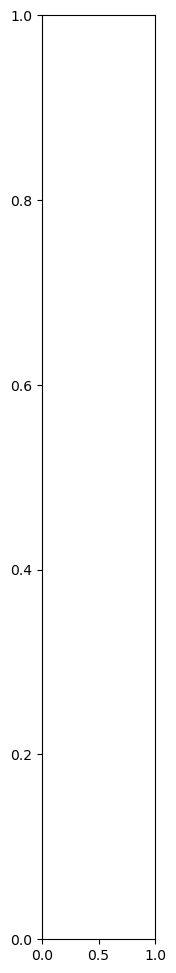

In [64]:
# /!\ Ne pas oublier de charger les fonctions
# Affichage de 5 images aléatoires du dataframe:
tirage_aleatoire(infos_images, infos_images['label'], infos_images['image_url'], nb_tirages=5)

#### Extraction des features

In [13]:
# Extraction des features des images de l'echantillon dans un DF nommé 'features_echantillon'
liste_features = []

for index, row in infos_images.iterrows():
    filepath = row['image_url']
    features = extract_features(filepath)
    liste_features.append(features)

features= pd.DataFrame(liste_features)
features_echantillon['moyenne_couleurs'] = (features['moyenne_rouge']\
                                        + features['moyenne_vert']\
                                        + features['moyenne_bleu']) / 3
feature()

,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs
0,242,320,140.558419,99.329261,72.831896,104.239859
1,240,320,75.290677,48.107969,42.921628,55.440091
2,320,240,93.194987,86.924505,70.685781,83.601758
3,320,240,75.084714,63.111328,46.745312,61.647118
4,320,240,110.422552,110.976523,111.686979,111.028685


In [14]:
features.describe()

,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs
count,20751.000000,20751.000000,20751.000000,20751.000000,20751.000000,20751.000000
mean,304.441955,250.890222,106.051509,97.330130,81.322763,94.901467
std,35.021058,40.710623,33.956250,31.776158,33.702601,31.427389
min,88.000000,86.000000,1.713070,4.362485,1.176329,2.956844
25%,320.000000,239.000000,83.659117,76.451230,58.189935,74.277699
50%,320.000000,240.000000,103.902116,96.031536,78.727465,93.284900
75%,320.000000,265.000000,125.481289,115.298319,100.382768,112.332662
max,320.000000,320.000000,251.141268,248.683404,250.057769,248.759523


#### Analyses des features

<Figure size 1600x1200 with 0 Axes>

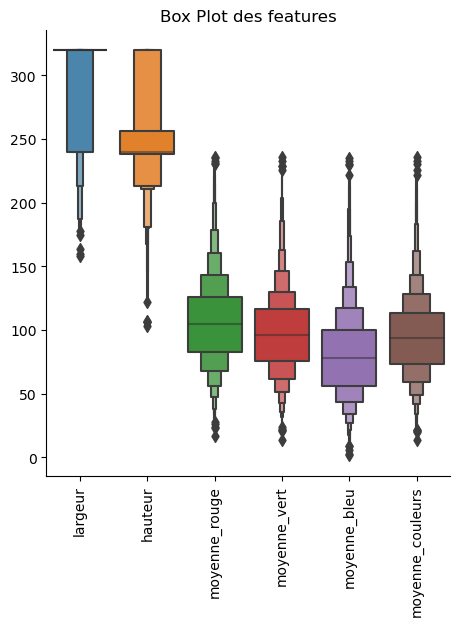

In [59]:
plt.figure(figsize=(16,12))
sns.catplot(features, kind='boxen')
plt.grid(False)
plt.title('Box Plot des features')
plt.xticks(rotation = 90);

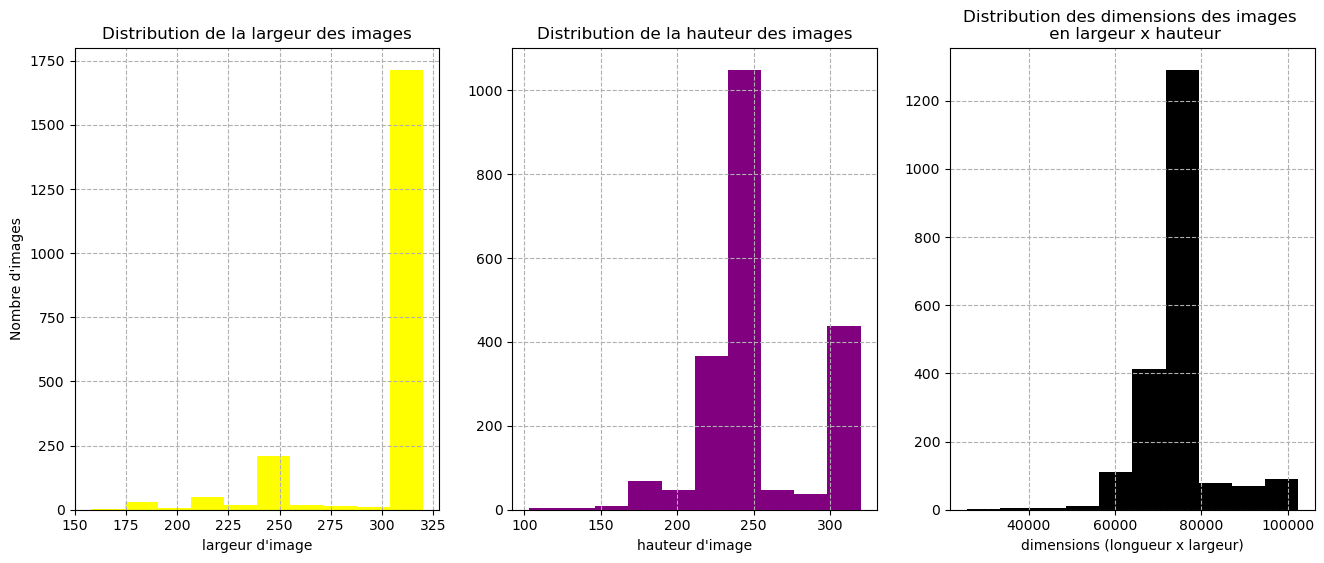

In [63]:
features['dimensions'] = (features['largeur'] * features['hauteur'])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16, 6))

ax1.hist(x = 'largeur', data = features, color='yellow')
ax1.set_title('Distribution de la largeur des images')
ax1.set_xlabel('largeur d\'image')
ax1.set_ylabel('Nombre d\'images')
ax1.grid(True, linestyle = '--')

ax2.hist(x = 'hauteur', data = features, color='purple')
ax2.set_title('Distribution de la hauteur des images')
ax2.set_xlabel('hauteur d\'image')
ax2.grid(True, linestyle = '--')
ax2.sharey=ax1

ax3.hist(x = 'dimensions', data = features, color='black')
ax3.set_title('Distribution des dimensions des images \n en largeur x hauteur')
ax3.set_xlabel('dimensions (longueur x largeur)')
ax3.grid(True, linestyle = '--')
ax2.sharey=ax1;

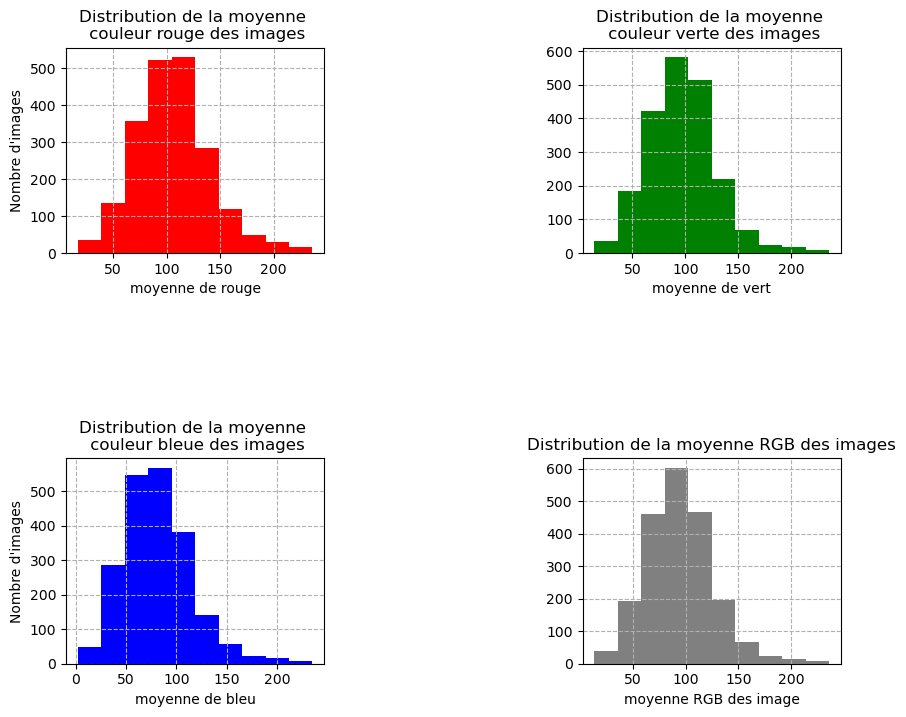

In [67]:
fig, ((ax4,ax5),(ax6,ax7)) = plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=1)

ax4.hist(x = 'moyenne_rouge', data = features, color='red')
ax4.set_title('Distribution de la moyenne \n couleur rouge des images')
ax4.set_xlabel('moyenne de rouge')
ax4.grid(True, linestyle = '--')
ax4.set_ylabel('Nombre d\'images')


ax5.hist(x = 'moyenne_vert', data = features, color='green')
ax5.set_title('Distribution de la moyenne \n couleur verte des images')
ax5.set_xlabel('moyenne de vert')
ax5.grid(True, linestyle = '--')
ax5.sharey=ax4

ax6.hist(x = 'moyenne_bleu', data = features, color='blue')
ax6.set_title('Distribution de la moyenne \n couleur bleue des images')
ax6.set_xlabel('moyenne de bleu')
ax6.grid(True, linestyle = '--')
ax6.set_ylabel('Nombre d\'images')

ax7.hist(x = 'moyenne_couleurs', data = features, color='gray')
ax7.set_title('Distribution de la moyenne RGB des images')
ax7.set_xlabel('moyenne RGB des image')
ax7.grid(True, linestyle = '--')
ax7.sharey=ax6

### Partie 10 espèces

#### Construction DF top 10

In [28]:
top10 = gen_top(infos_images,top=10)
top10.head()

Nombre d'images chargées : 64373
Nb de labels uniques: 10


,label,image_lien,image_url
0,Agaricales,486562.jpg,..../images/486562.jpg
1,Agaricales,509189.jpg,..../images/509189.jpg
2,Agaricales,486561.jpg,..../images/486561.jpg
3,Agaricales,231418.jpg,..../images/231418.jpg
4,Agaricales,508881.jpg,..../images/508881.jpg


In [ ]:
# /!\ Ne pas oublier de charger les fonctions
# Affichage de 5 images aléatoires du dataframe:
tirage_aleatoire(top10, top10['label'], top10['image_url'], nb_tirages=5)

#### Extraction des features

In [ ]:
# Extraction des features des images du top 10
liste_features = []

for index, row in top10.iterrows():
    filepath = row['image_url']
    features = extract_features(filepath)
    liste_features.append(features)

features_top10 = pd.DataFrame(liste_features)
features_top10['moyenne_couleurs'] = (features_top10['moyenne_rouge']\
                                        + features_top10['moyenne_vert']\
                                        + features_top10['moyenne_bleu']) / 3

features_top10['label'] = top10['label']
features_top10.head()

#### Analyses des features

<Figure size 1600x1200 with 0 Axes>

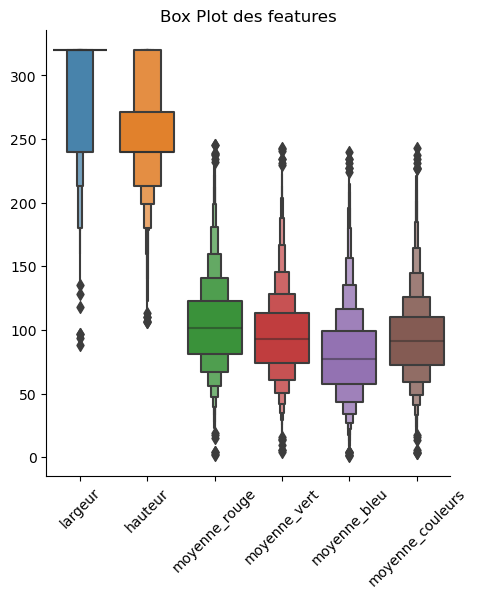

In [14]:
plt.figure(figsize=(16,12))
sns.catplot(features_top10, kind='boxen')
plt.grid(False)
plt.title('Box Plot des features')
plt.xticks(rotation = 45);

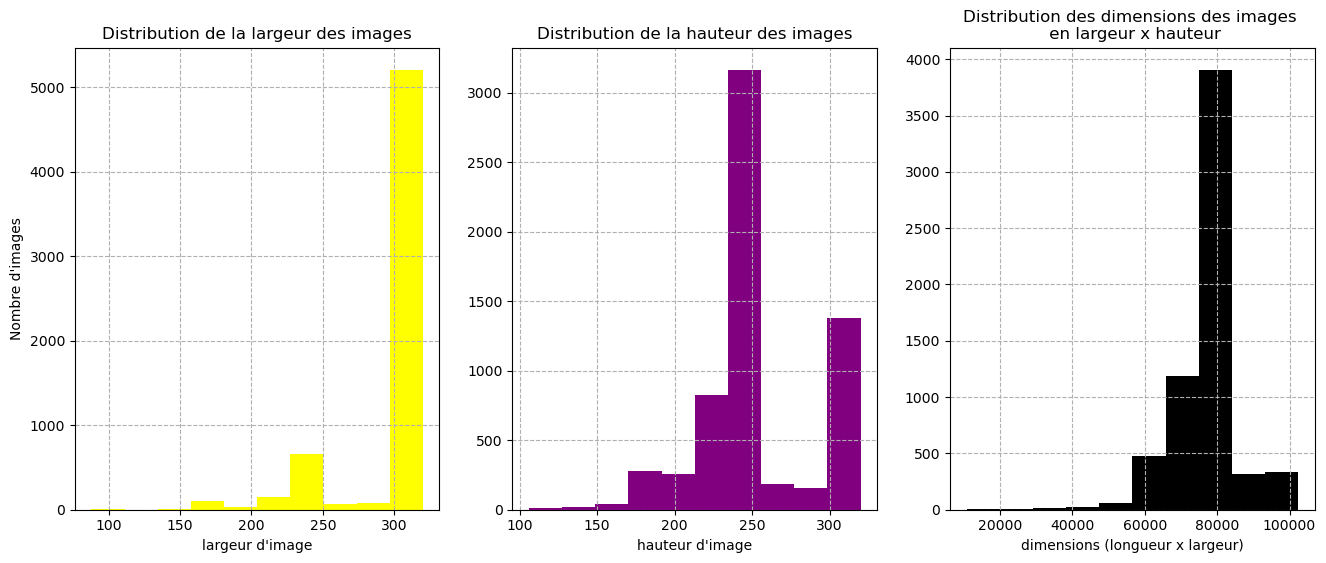

In [15]:
features_top10['dimensions'] = (features_top10['largeur'] * features_top10['hauteur'])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16, 6))

ax1.hist(x = 'largeur', data = features_top10, color='yellow')
ax1.set_title('Distribution de la largeur des images')
ax1.set_xlabel('largeur d\'image')
ax1.set_ylabel('Nombre d\'images')
ax1.grid(True, linestyle = '--')

ax2.hist(x = 'hauteur', data = features_top10, color='purple')
ax2.set_title('Distribution de la hauteur des images')
ax2.set_xlabel('hauteur d\'image')
ax2.grid(True, linestyle = '--')
ax2.sharey=ax1

ax3.hist(x = 'dimensions', data = features_top10, color='black')
ax3.set_title('Distribution des dimensions des images \n en largeur x hauteur')
ax3.set_xlabel('dimensions (longueur x largeur)')
ax3.grid(True, linestyle = '--')
ax2.sharey=ax1;

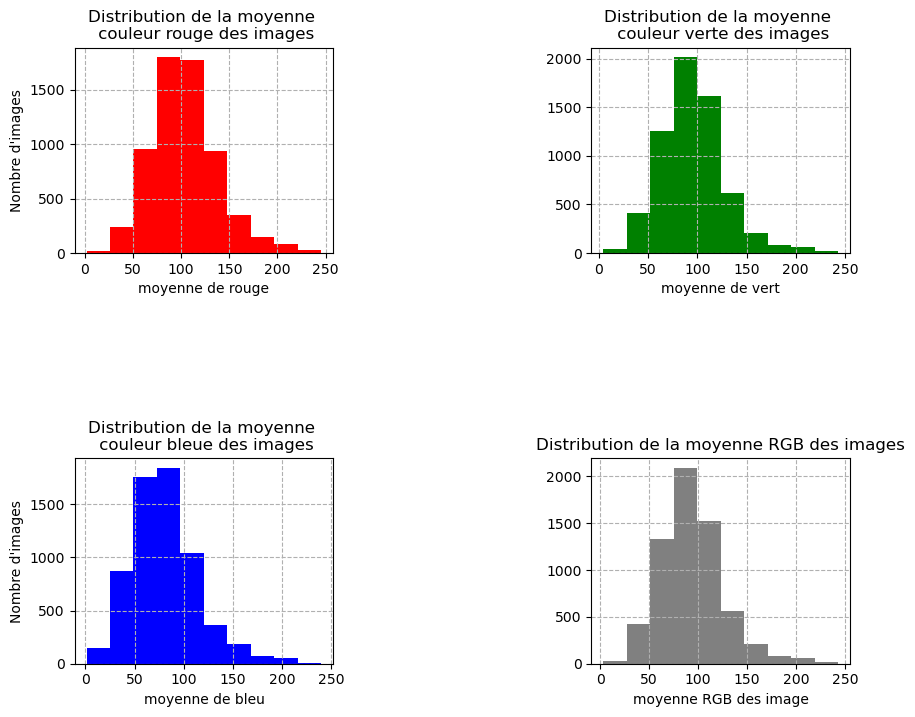

In [16]:
fig, ((ax4,ax5),(ax6,ax7)) = plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=1)

ax4.hist(x = 'moyenne_rouge', data = features_top10, color='red')
ax4.set_title('Distribution de la moyenne \n couleur rouge des images')
ax4.set_xlabel('moyenne de rouge')
ax4.grid(True, linestyle = '--')
ax4.set_ylabel('Nombre d\'images')


ax5.hist(x = 'moyenne_vert', data = features_top10, color='green')
ax5.set_title('Distribution de la moyenne \n couleur verte des images')
ax5.set_xlabel('moyenne de vert')
ax5.grid(True, linestyle = '--')
ax5.sharey=ax4

ax6.hist(x = 'moyenne_bleu', data = features_top10, color='blue')
ax6.set_title('Distribution de la moyenne \n couleur bleue des images')
ax6.set_xlabel('moyenne de bleu')
ax6.grid(True, linestyle = '--')
ax6.set_ylabel('Nombre d\'images')

ax7.hist(x = 'moyenne_couleurs', data = features_top10, color='gray')
ax7.set_title('Distribution de la moyenne RGB des images')
ax7.set_xlabel('moyenne RGB des image')
ax7.grid(True, linestyle = '--')
ax7.sharey=ax6

In [17]:
gb = features_top10.groupby('label').agg({
'largeur': 'mean',
'hauteur': 'mean',
'moyenne_rouge': 'mean',
'moyenne_vert': 'mean',
'moyenne_bleu': 'mean',
'moyenne_couleurs': 'mean',
'dimensions': 'sum'
})

In [18]:
gb.reset_index(inplace=True)
gb

,label,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs,dimensions
0,Agaricales,299.090435,257.049565,103.279758,94.208797,78.979798,92.156117,87072603
1,Agaricus,301.649573,253.829060,100.003730,91.761871,79.147052,90.304218,35275684
2,Amanita,299.303213,255.317269,95.444550,88.869327,74.886190,86.400023,37389120
3,Cortinarius,308.250693,247.084488,109.531435,97.583745,82.433073,96.516084,54403840
4,Entoloma,305.628297,250.551559,104.087400,97.936556,82.085006,94.702987,31515840
5,Inocybe,309.116105,248.814607,113.896878,104.082159,88.800543,102.259860,40657600
6,Mycena,300.516008,253.902072,101.705100,93.795139,77.526494,91.008911,39832320
7,Polyporales,308.100443,244.740030,104.091886,95.770592,80.946597,93.603025,50442560
8,Psathyrella,304.810964,253.270321,107.200229,101.241717,85.434795,97.958913,40302400
9,Russula,308.223602,246.047205,100.139019,91.290068,78.166209,89.865098,60458760


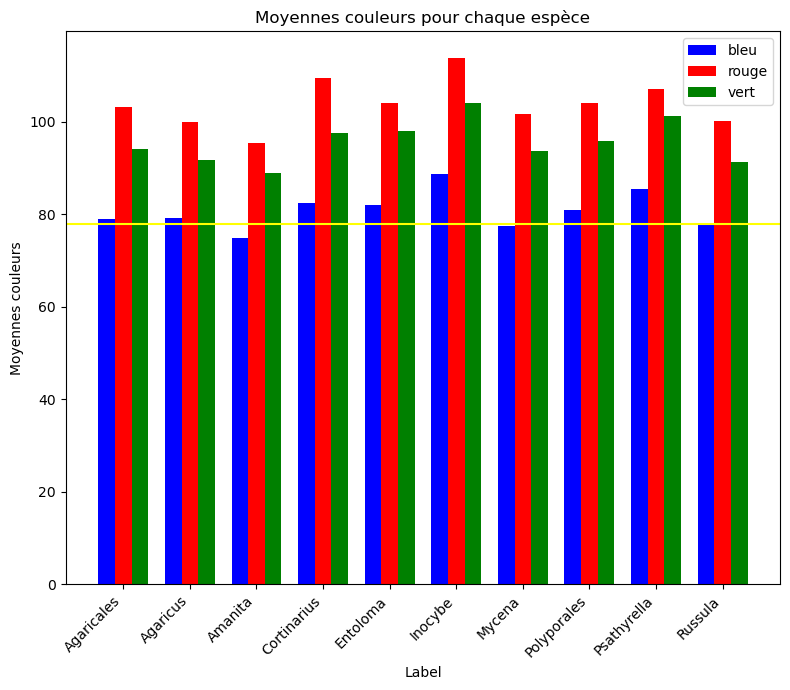

In [23]:
x = np.arange(len(gb))
fig, ax = plt.subplots(figsize=(8, 7))
width = 0.25  # Largeur des barres

rects1 = ax.bar(x - width, gb['moyenne_bleu'], width=width, label='bleu', color='blue')
rects2 = ax.bar(x, gb['moyenne_rouge'], width=width, label='rouge', color='red')
rects3 = ax.bar(x + width, gb['moyenne_vert'], width=width, label='vert', color='green')

ax.set_xlabel('Label')
ax.set_ylabel('Moyennes couleurs')
ax.set_title('Moyennes couleurs pour chaque espèce')
ax.set_xticks(x)
ax.set_xticklabels(gb['label'], rotation=45, ha='right')
plt.axhline(y=78, c='yellow')
ax.legend()
# Afficher le diagramme
plt.tight_layout()
plt.show()